In [2]:
import yfinance as yf

df = yf.download(tickers='AMD', period='5y', interval='1d')
df['Change'] = (df['Close'].shift(-1) - df['Close'])
df['Target'] = (df['Change'] > 0).astype(int)
df = df.iloc[:-1]
df.tail(30)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Change,Target
Date,,,,,,,,
2024-12-10,131.559998,131.559998,127.070000,127.739998,127.739998,38907200,2.409996,1
2024-12-11,128.520004,131.210007,126.220001,130.149994,130.149994,45588100,0.450012,1
2024-12-12,130.000000,132.320007,129.070007,130.600006,130.600006,34267100,-3.690002,0
2024-12-13,131.300003,131.300003,124.769997,126.910004,126.910004,67544700,-0.220001,0
2024-12-16,126.010002,127.760002,123.120003,126.690002,126.690002,42090300,-1.670006,0
2024-12-17,124.449997,127.080002,123.150002,125.019997,125.019997,43314900,-3.609993,0
2024-12-18,125.430000,127.750000,120.430000,121.410004,121.410004,49724400,-2.530006,0
2024-12-19,122.160004,123.379997,118.449997,118.879997,118.879997,46160700,0.330002,1
2024-12-20,118.000000,121.860001,117.900002,119.209999,119.209999,53591200,5.389999,1


In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# df = df.sort_values(by="Date", ascending=True).reset_index(drop=True)


X = df[['Open', 'High', 'Low', 'Close']]
y = df['Target']

train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:]
y_val = y.iloc[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)


In [5]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric = 'logloss',
    random_state = 42
)

param_grid = {
    'n_estimators': [2, 5, 10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [2, 3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10, 100]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=tscv,
    n_jobs=-1,            
    verbose=1
)

model.fit(X_train_scaled, y_train)
# grid_search.fit(X_train_scaled, y_train)
# print("Best parameters from GridSearchCV:", grid_search.best_params_)
# print("Best CV Score (acc):", grid_search.best_score_)

/Users/guanyulu/anaconda3/envs/res_proj/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:59:37] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [6]:
# best_model = grid_search.best_estimator_
# best_model.fit(X_train_scaled,y_train)


# y_val_pred = best_model.predict(X_val_scaled)
y_val_pred = model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", acc)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.503968253968254
Confusion Matrix:
[[70 66]
 [59 57]]


In [7]:
# Check class distribution in the entire dataset
print("Overall Class Distribution:")
print(df['Target'].value_counts())

# Check class distribution in training set
print("\nTraining Set Class Distribution:")
print(y_train.value_counts())

# Check class distribution in validation set
print("\nValidation Set Class Distribution:")
print(y_val.value_counts())

Overall Class Distribution:
Target
0    638
1    618
Name: count, dtype: int64

Training Set Class Distribution:
Target
0    502
1    502
Name: count, dtype: int64

Validation Set Class Distribution:
Target
0    136
1    116
Name: count, dtype: int64


Predicted Probabilities:
count    503.000000
mean       0.516250
std        0.000702
min        0.513804
25%        0.515816
50%        0.516304
75%        0.517028
max        0.517267
dtype: float64


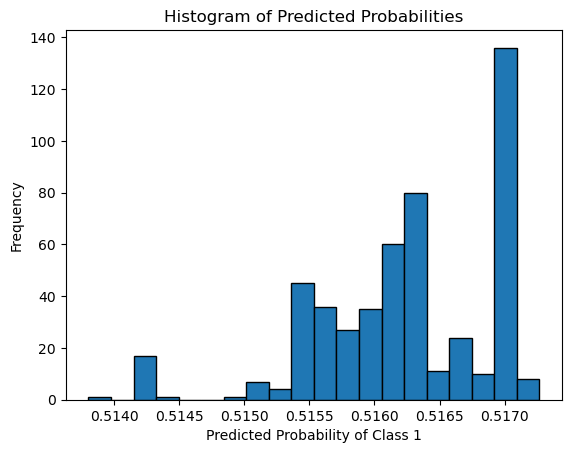

In [46]:
# Get predicted probabilities
y_val_prob = best_model.predict_proba(X_val_scaled)[:, 1]  # Probability of class 1

# Summary statistics
print("Predicted Probabilities:")
print(pd.Series(y_val_prob).describe())

# Plot histogram of predicted probabilities
import matplotlib.pyplot as plt

plt.hist(y_val_prob, bins=20, edgecolor='k')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

NameError: name 'plt' is not defined

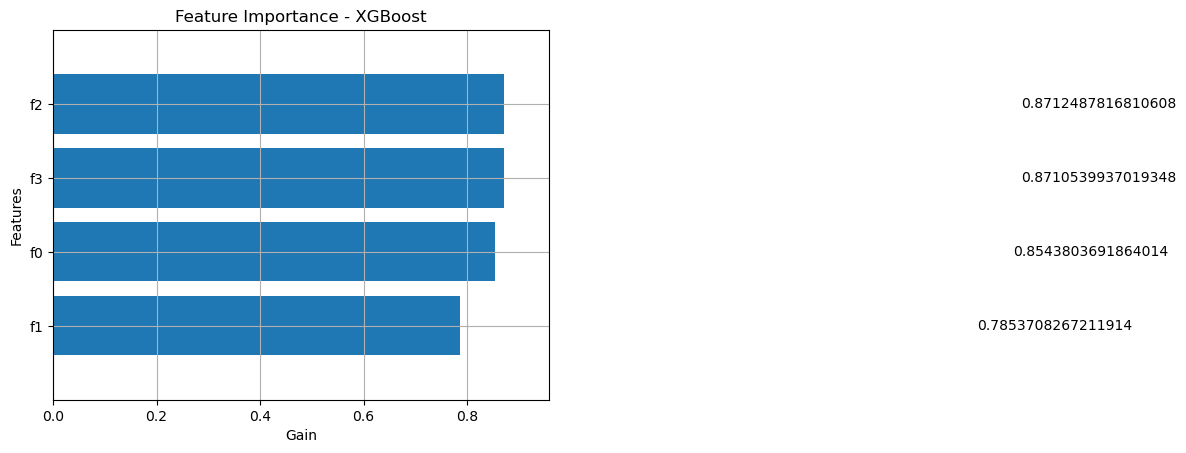

In [8]:
from xgboost import plot_importance

plot_importance(model,
                max_num_features=10, 
                height=0.8,
                importance_type='gain',
                title='Feature Importance - XGBoost',
                xlabel='Gain',
                ylabel='Features')
plt.show()